<div style="font-family: Arial,sans-serif; color: #3070b3; font-size: 13px; line-height: 14px; ">
    <div style="float:right;">
        <a href="https://www.asg.ed.tum.de/en/lmf" title="Home">
            <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Logo_of_the_Technical_University_of_Munich.svg" alt="Technical University of Munich" style="height: 42px">
        </a>
    </div>
    <div>
        <ul style="padding: 0pt; margin: 0pt; list-style-type: none;">
            <li> <a href="https://www.asg.ed.tum.de/en/lmf/" title="Home Chair of Remote Sensing Technology" style="text-decoration: none;">Chair of Remote Sensing Technology</a></li>
            <li> <a href="https://www.ed.tum.de/en/" title="Home TUM School of Engineering and Design" style="text-decoration: none;">TUM School of Engineering and Design</a></li>
            <li> <a href="https://www.tum.de/en/" title="Home Technical University of Munich" style="text-decoration: none;"> Technical University of Munich </a></li>
        </ul>
    </div>
</div>

<div style="font-family: Arial,sans-serif; font-size: 14px; line-height: 16px; margin-top:50px">
    <div style="float:right;">
        <span style="font-size:small">Prof. Dr. rer. nat. habil.</span><br />
        <b>Marco Körner</b><br />
    </div>
    <div style="">
        <h1>Machine Learning &mdash; Advanced Methods</h1>
        <p style="font-size:large">Summer Term 2024</p>
    </div>
</div>

---

## 0. Getting Started

This notebook intends to test your local or server-side JupyterLab environment.

### Importing Python libraries

We're using a set of Python libraries that provide various functionality useful for our purposes. 
All of them are defined in the `environment.yml` file.

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
import pandas as pd

from ipywidgets import interact, widgets
from IPython.display import Math, Latex
from IPython.display import Markdown as md

### Example: Importance Sampling

Let $P(x) = 3\mathrm{e}^{-\frac{x^2}{2}} + \mathrm{e}^{-\frac{(x-4)^2}{2}}$ be a distribution we want to sample from.
Note that this is an unnormalized distribution with a normalizing constant $Z \approx 10.0262$ we can compute but let's keep it as it is.  

In [2]:
P = lambda x: 3 * np.exp(-x*x/2) + np.exp(-(x - 4)**2/2)
Z = 10.0261955464

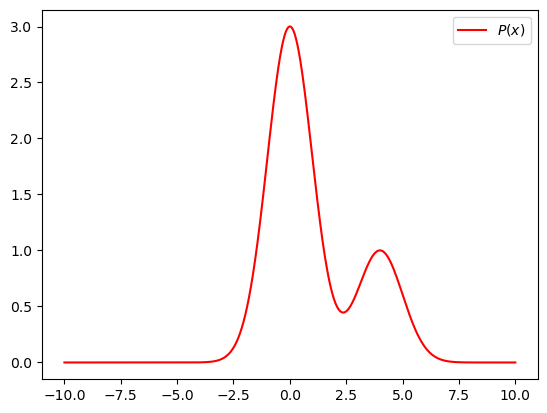

In [3]:
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)
plt.figure(1)
plt.plot(x_vals, y_vals, 'r', label='$P(x)$')
plt.legend()
plt.show()

In [4]:
f_x = lambda x: x
g_x = lambda x: np.sin(x)
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640

In [5]:
Latex(f"""
We want to approximate the functions $f(x) = x$ and $g(x) = \\sin(x)$.
The two values for a unnormalized are:
\\begin{{align}}
  \\mathbb{{E}}[x] &\\approx {{{true_expected_fx}}} \\\\
  \\mathbb{{E}}[g(x)] &\\approx -1.15088010640
\\end{{align}}
""")

<IPython.core.display.Latex object>

### Importance Sampling

$$\mathbb{E}_{x \sim P}[f(x)] = \mathbb{E}_{x \sim Q}\Big[f(x)\frac{P(x)}{Q(x)}\Big]$$
Which means  $\mathbb{E}_{x \sim P}[f(x)] \approx \frac{1}{n}\sum_{i=1}^nf(x_i)\frac{P(x_i)}{Q(x_i)}$ where $x_i$ are drawn from $Q$. This applies when $P$ and $Q$ are both normalized. For unnormalized case    
$$\mathbb{E}_{x \sim P}[f(x)] \approx \frac{\sum_{i=1}^nf(x_i)\frac{P(x_i)}{Q(x_i)}}{\sum_{i=1}^n\frac{P(x_i)}{Q(x_i)}}$$  
Let the proposal distribution $Q(x)$ be a uniform distribution in $[-4,8]$.   
$Q(x) = \frac{1}{8 + 4}$ for $x \in [-4,8]$

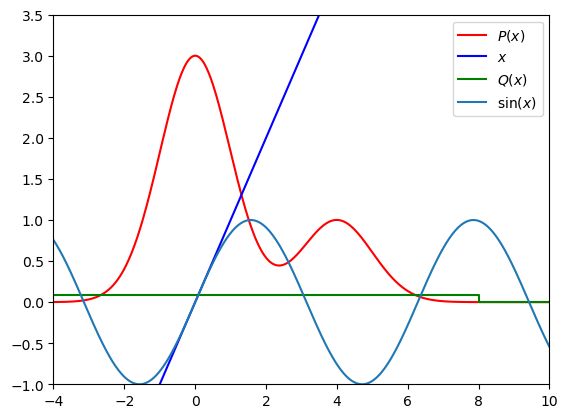

In [6]:
a, b = -4, 8
uniform_prob = 1./(b - a)
plt.figure(2)
plt.plot(x_vals, y_vals, 'r', label='$P(x)$')
plt.plot(x_vals, f_x(x_vals), 'b', label='$x$')
plt.plot([-10, a, a, b, b, 10], [0, 0, uniform_prob, uniform_prob, 0, 0], 'g', label='$Q(x)$')
plt.plot(x_vals, np.sin(x_vals), label='$\\sin(x)$')
plt.xlim(-4, 10)
plt.ylim(-1, 3.5)
plt.legend()
plt.show()

In [7]:
expected_f_x = 0.
expected_g_x = 0.
n_samples = 100000
den = 0.
for i in range(n_samples):
    sample = np.random.uniform(a, b)
    importance = P(sample) / uniform_prob
    den += importance
    expected_f_x += importance * f_x(sample)
    expected_g_x += importance * g_x(sample)
    
expected_f_x /= den
expected_g_x /= den
expected_f_x *= Z
expected_g_x *= Z

In [8]:
Latex(f"""
We want to approximate the functions $f(x) = x$ and $g(x) = \\sin(x)$.
The two values for an unnormalized are:
\\begin{{align}}
  \\mathbb{{E}}[f(x)] &= {{{expected_f_x:.5f}}} & \\varepsilon_f &= {{{abs(expected_f_x - true_expected_fx):.5f}}} \\\\
  \\mathbb{{E}}[g(x)] &= {{{expected_g_x:.5f}}} & \\varepsilon_g &= {{{abs(expected_g_x - true_expected_gx):.5f}}}
\\end{{align}}
""")


<IPython.core.display.Latex object>